# K-means Cluster

## Import and clean

In [212]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

%matplotlib inline
pd.set_option('display.max_columns', 500)

In [213]:
# import the combined data and check the data
df = pd.read_csv('../datasets/combined_final.csv')
df.head()

,county,all_industries,nat_resource_mining,construction,manufacturing,trade_trans_util,information,financial,prof_bus_services,education_health,leisure_hospitality,other_x,government,housing_units,highway_miles,lane_miles,number_of_bridges,state_facilities,facilities_sq_ft,conservation_lands,con_land_acres,non_cons_lands,non_con_acreage,revenue_(000),revenue_per_capita,tota_spending_(000),spending_per_capita,spending_pct_revenue,govt_service_spending,ggs_per_capita,ggs_pct_revenue,public_safety_(000),ps_per_capita,ps_pct_revenue,phys_env_(000),pe_per_capita,pe_pct_revenue,transportation_(000),transp_per_capita,transp_pct_revenue,economic_environment_(000),ee_per_capita,ee_pct_revenue,human_services_(000),hs_per_capita,hs_pct_revenue,num_emp_rca_Accommodation & Food Service,num_emp_rca_Admin._Support_Waste Management Services,num_emp_rca_Agriculture_Forestry_Fishing_Hunting,num_emp_rca_Arts_Entertainment_Recreation,num_emp_rca_Construction,num_emp_rca_Educational Services,num_emp_rca_Finance & Insurance,num_emp_rca_Healthcare & Social Assistance,num_emp_rca_Information,num_emp_rca_Management of Companies & Enterprises,num_emp_rca_Manufacturing,num_emp_rca_Mining_Quarrying_Oil_Gas Extraction,num_emp_rca_Other services_except public administration,num_emp_rca_Professional_Scientific_Tech Services,num_emp_rca_Public Admin.,num_emp_rca_Real Estate_Rental & Leasing,num_emp_rca_Retail trade,num_emp_rca_Transportation & Warehousing,num_emp_rca_Utilities,num_emp_rca_Wholesale trade,biomass,coal,hydroelectric,natural gas,nuclear,other_y,petroleum,solar,ihProgramDeclared_Coastal Storm,ihProgramDeclared_Fire,ihProgramDeclared_Flood,ihProgramDeclared_Freezing,ihProgramDeclared_Human Cause,ihProgramDeclared_Hurricane,ihProgramDeclared_Severe Storms,ihProgramDeclared_Tornado,iaProgramDeclared_Coastal Storm,iaProgramDeclared_Fire,iaProgramDeclared_Flood,iaProgramDeclared_Freezing,iaProgramDeclared_Human Cause,iaProgramDeclared_Hurricane,iaProgramDeclared_Severe Storms,iaProgramDeclared_Tornado,paProgramDeclared_Coastal Storm,paProgramDeclared_Fire,paProgramDeclared_Flood,paProgramDeclared_Freezing,paProgramDeclared_Human Cause,paProgramDeclared_Hurricane,paProgramDeclared_Severe Storms,paProgramDeclared_Tornado,hmProgramDeclared_Coastal Storm,hmProgramDeclared_Fire,hmProgramDeclared_Flood,hmProgramDeclared_Freezing,hmProgramDeclared_Human Cause,hmProgramDeclared_Hurricane,hmProgramDeclared_Severe Storms,hmProgramDeclared_Tornado,number of claims_irma,closed claims (paid)_irma,closed claims (not paid)_irma,number claims open_irma,percent claims closed_irma,number of claims_michael,closed claims (paid)_michael,closed claims (not paid)_michael,number claims open_michael,percent claims closed_michael,foreign_avg,us_avg,avg_age,hospitals
0,alachua,7145,81,652,206,1294,108,663,1662,955,713,646,0,112766,293.4,1038.1,70,365,1715400,160,39553.9,266,12458.7,371979.0,1447.04,384797.30,1496.90,103.4,92238.56,358.82,24.8,106840.80,415.62,28.7,24687.23,96.04,6.6,16083.32,62.57,4.3,12643.76,49.19,3.4,16334.64,63.54,8.0,1.19357,0.988769,0.814928,1.075090,0.682758,2.274750,0.639125,1.32615,0.597872,0.693594,0.405275,0.616266,1.267320,0.733338,0.729998,0.909452,0.879142,0.532053,1.140020,0.332817,1.0,1.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,1.0,0.0,5.0,0.0,0.0,0.0,8.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,1.0,0.0,"4,218","2,353","1,755",110,97.4%,0,0,0,0,0,38.8,30.3,34.55,6
1,baker,425,6,58,5,124,7,25,44,38,43,39,34,9687,83.9,225.9,36,146,1011633,24,37865.7,12,661.2,50261.7,1863.96,49131.84,1822.06,97.8,6782.15,251.52,13.5,25012.50,927.59,49.8,810.64,30.06,1.6,3832.29,142.12,7.6,1274.45,47.26,2.5,806.17,29.90,1.6,0.65370,1.226440,0.444973,0.321499,1.395160,0.780370,0.679071,1.28299,0.599213,0.000000,0.597901,0.000000,0.827931,0.592165,2.274550,0.461420,1.157390,1.808970,1.182430,0.978641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,4.0,1.0,0.0,5.0,1.0,0.0,0.0,9.0,6.0,1.0,0.0,0.

In [214]:
# pick the necessary columns and make a new dataframe
features = ['nat_resource_mining','trade_trans_util','information','education_health','leisure_hospitality',
     'government','housing_units','highway_miles','number_of_bridges','state_facilities','number of claims_irma',
     'number of claims_michael', 'hospitals']
df2 = df[features].copy()

In [215]:
# check the data types of the columns
df2.dtypes

nat_resource_mining           int64
trade_trans_util              int64
information                   int64
education_health              int64
leisure_hospitality           int64
government                    int64
housing_units                 int64
highway_miles               float64
number_of_bridges             int64
state_facilities              int64
number of claims_irma        object
number of claims_michael     object
hospitals                     int64
dtype: object

In [216]:
# remove comma from the number and make the data type to integer
df2['number of claims_irma'] = [int(i.replace(',','')) for i in df2['number of claims_irma']]
df2['number of claims_michael'] = [int(i.replace(',','')) for i in df2['number of claims_michael']]

# Scale and EDA

In [217]:
# scale the data and make a new dataframe
ss = StandardScaler()
df3 = pd.DataFrame(ss.fit_transform(df2), columns = df2.columns)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


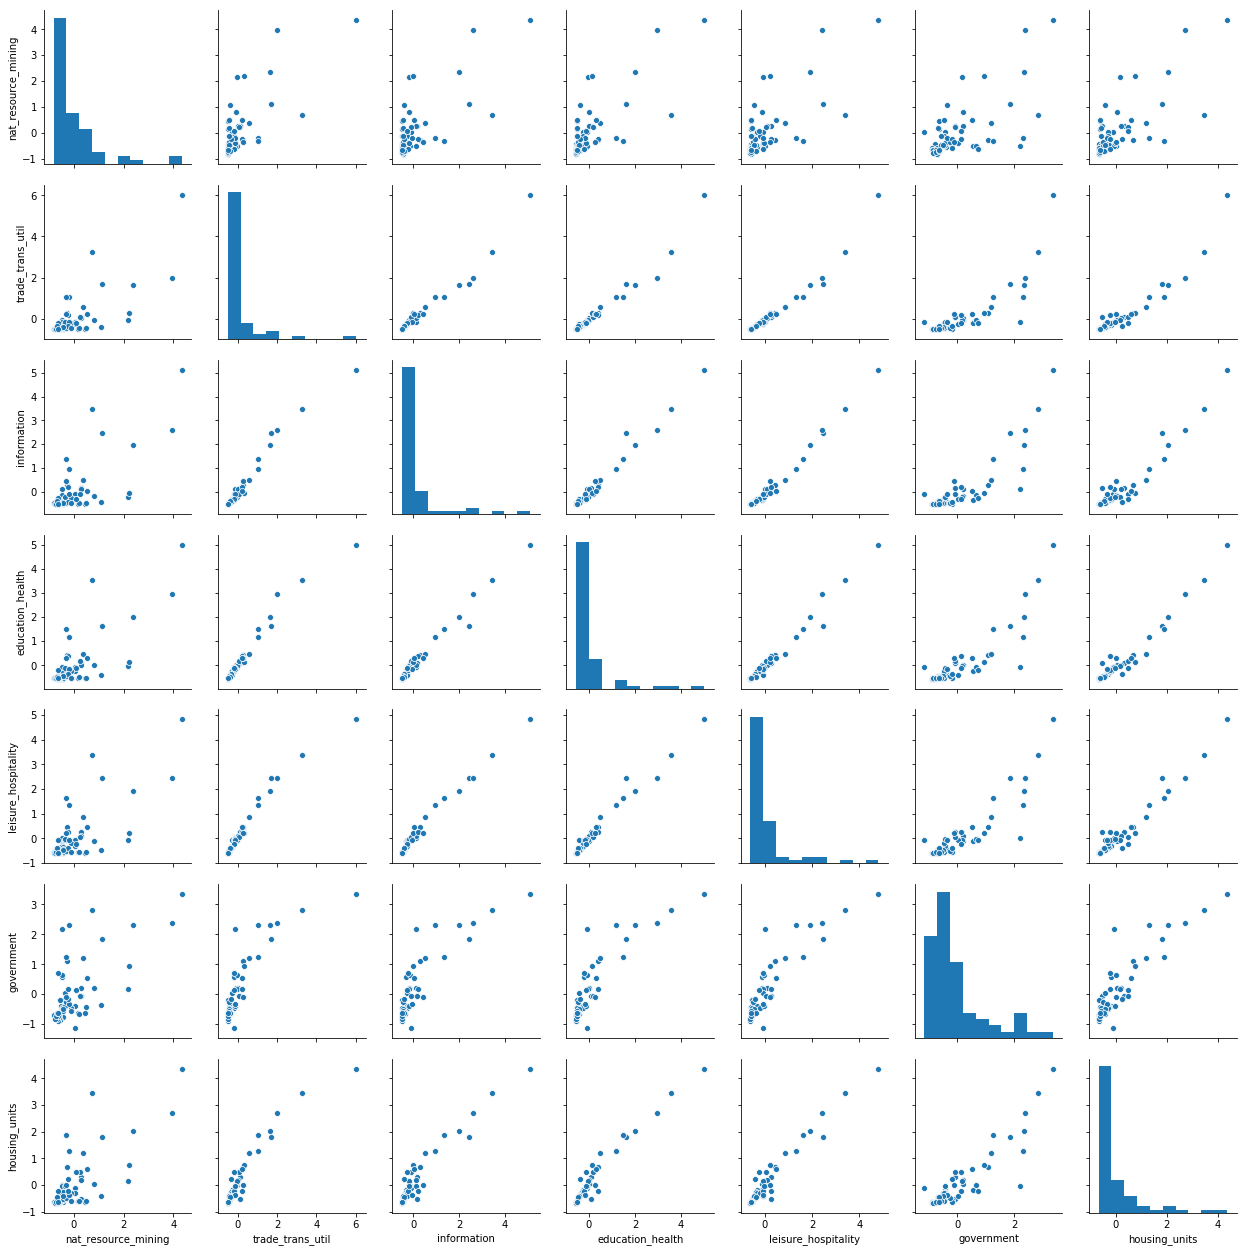

In [218]:
# make pairplot of first 7 columns
sns.pairplot(df3.iloc[:,:7]);

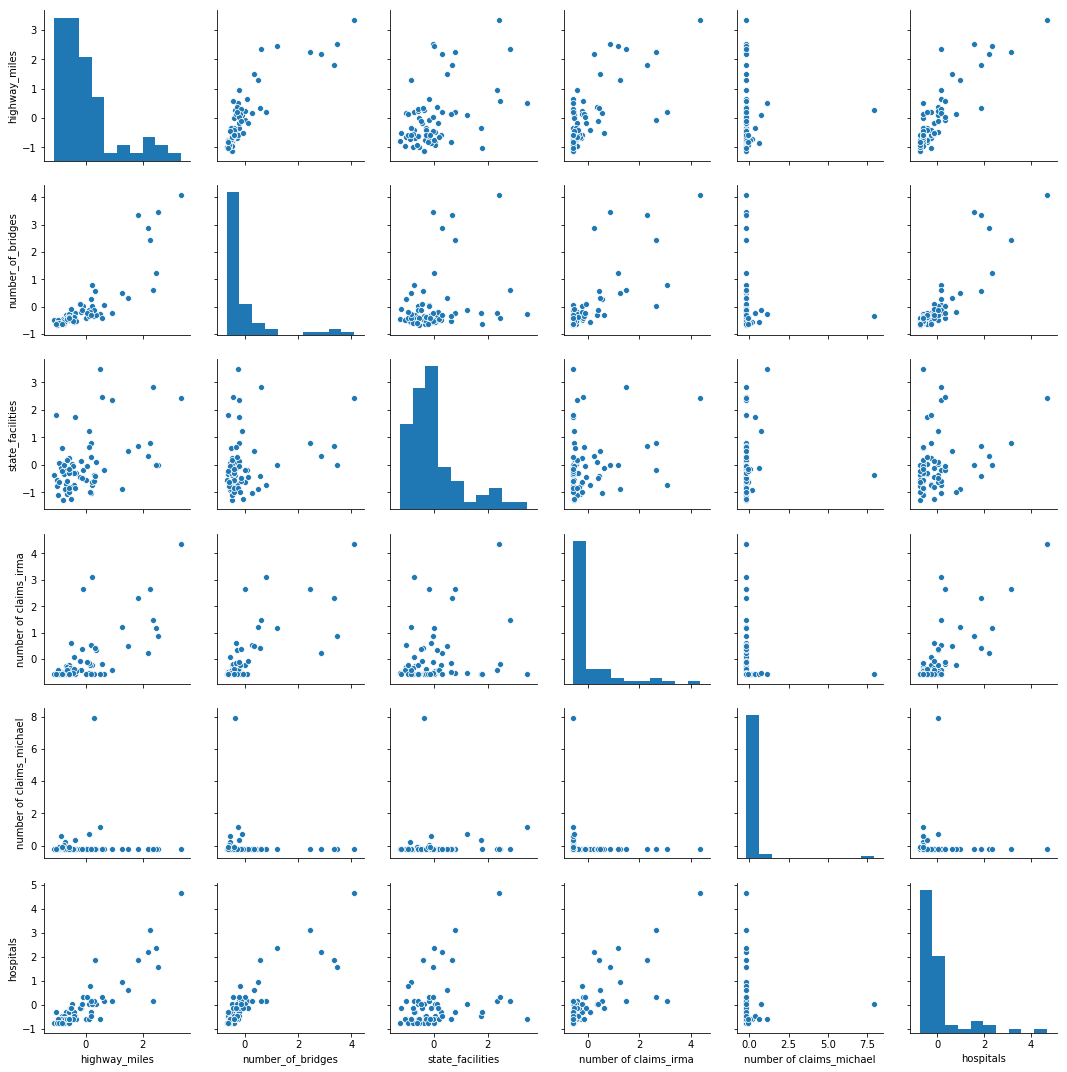

In [219]:
# make pairplots of last 6 columns
sns.pairplot(df3.iloc[:,7:]);

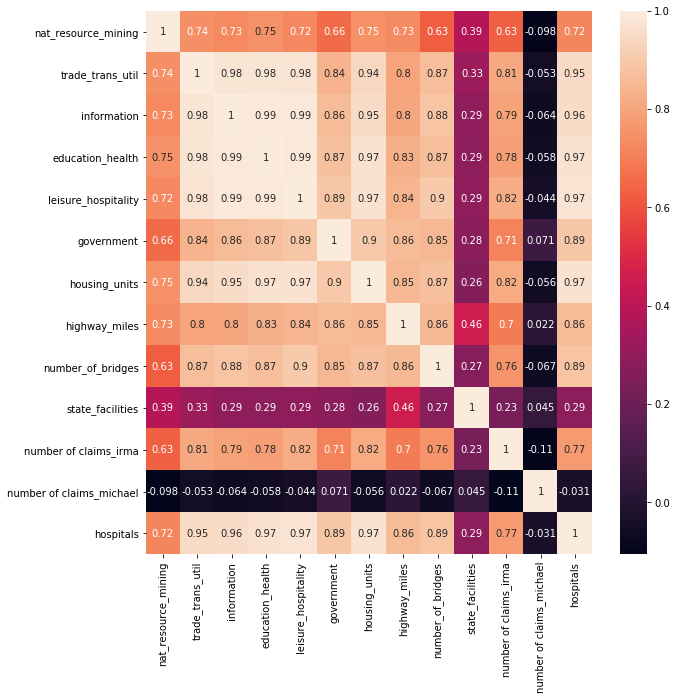

In [220]:
plt.figure(figsize = (10,10))
sns.heatmap(df3.corr(), annot = True);

# Kmeans cluster

In [221]:
# perform clustering with 7 clusters and check the silhouette score
kmean = KMeans(n_clusters=7)
model = kmean.fit(df3)

2(df3, model.labels_)

0.3212354167058645

In [222]:
# check the labels
model.labels_

array([6, 3, 5, 3, 4, 2, 3, 3, 3, 3, 4, 0, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 2, 3, 3, 6, 3, 3, 0, 4, 0, 3, 3, 3, 0, 6, 0, 1, 0,
       3, 0, 3, 2, 0, 2, 0, 4, 6, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 4, 3, 3,
       3], dtype=int32)

# PCA

In [223]:
# Perform PCA
pca = PCA()
df3_pca = pca.fit_transform(df3)

In [224]:
# Check the variance ratio
var_exp = pca.explained_variance_ratio_
print('Explained variance:            ', var_exp)

cum_var_exp = np.cumsum(var_exp)
print('Cumulative explained variance: ', cum_var_exp)

Explained variance:             [7.42340191e-01 8.24444392e-02 7.18857611e-02 3.00225385e-02
 2.53704884e-02 2.24773352e-02 1.10649265e-02 7.14332901e-03
 3.43854987e-03 1.81197377e-03 1.34764482e-03 4.33212905e-04
 2.19609705e-04]
Cumulative explained variance:  [0.74234019 0.82478463 0.89667039 0.92669293 0.95206342 0.97454075
 0.98560568 0.99274901 0.99618756 0.99799953 0.99934718 0.99978039
 1.        ]


In [225]:
n_comp = len(pca.explained_variance_ratio_.cumsum()[pca.explained_variance_ratio_.cumsum() <= 0.90])
print("Keeping 90% Info with ",n_comp," components")

Keeping 90% Info with  3  components


In [226]:
# Perform PCA with 5 components
pca2 = PCA(n_components=3)
df3_pca = pd.DataFrame(pca2.fit_transform(df3), columns = ['PC1', 'PC2', 'PC3'])

In [227]:
# perform clustering with 3 PCA components and check the silhouette score
kmean = KMeans(n_clusters=7)
model = kmean.fit(df3_pca)

silhouette_score(df3_pca, model.labels_)

0.44398865473019694

In [228]:
df3_pca['label'] = model.labels_
df3_pca.head()

,PC1,PC2,PC3,label
0,-0.073460,1.105864,-2.264818,6
1,-1.910559,-0.130097,-0.195769,2
2,-0.619465,6.664257,4.288702,4
3,-1.970636,-0.140282,-0.254914,2
4,1.956380,-0.558024,0.948921,5


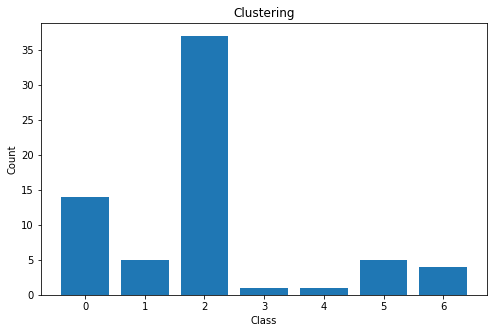

In [229]:
temp = pd.DataFrame(df3_pca['label'].value_counts())
temp.reset_index(inplace = True)
plt.figure(figsize = (8,5))
plt.bar(temp['index'], temp['label'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Clustering');